In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Activation, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import joblib
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
def label2onehot(label: np.array) -> np.array:
    thresholds = [0.25, 0.75, 1.25, 1.75]

    categorical_labels = np.digitize(label, thresholds)

    one_hot_encoder = to_categorical(categorical_labels)
    
    return one_hot_encoder

In [24]:
data_path = '../data/simulated_cyp2d6_diplotypes/*.vcf'
label_path = '../data/simulated_cyp2d6_diplotypes/*.csv'
batch_label = glob.glob(label_path)
batch_data = glob.glob(data_path)

In [34]:
batch_label

['../data/simulated_cyp2d6_diplotypes\\batch_118.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_119.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_12.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_120.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_121.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_122.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_123.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_124.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_125.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_126.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_127.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_128.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_129.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_13.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_130.labels.csv',
 '../data/simulated_cyp2d6_diplotypes\\batch_131.labels.csv',
 '../data/

In [35]:
for i in range(len(batch_data)):
    print(int(batch_data[i].split("\\")[1].split(".")[0].split("_")[1]) - int(batch_label[i].split("\\")[1].split(".")[0].split("_")[1]))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [18]:
def load_data() -> tuple:
    X = None
    y = None
    all_path = sorted(glob.glob('../data/input_data/*'))
    # count = 1
    for count, path in enumerate(all_path):
        if count == 5:
            break
        print(f"{count}. {path.split('/')[-1].split('.')[0]}")
        data_loaded = joblib.load(path)
        if X is None:
            X = data_loaded['X']
            y = data_loaded['activate_score']
        else:
            X = np.concatenate((X, data_loaded['X']), axis=0)
            y = np.concatenate((y, data_loaded['activate_score']), axis=0)

        
        # count += 1
    
    y = y.reshape(-1, 1)
    y = label2onehot(y)
     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=10)        
    
    # y_train = y_train.reshape(-1, 1)
    # y_test = y_test.reshape(-1, 1)
    
    # y_train = label2onehot(y_train)
    # y_test = label2onehot(y_test)
    
    return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = load_data()
    
input_shape = X_train.shape[1:]

0. input_data\batch_118
1. input_data\batch_119
2. input_data\batch_12
3. input_data\batch_120
4. input_data\batch_121


In [5]:
print(f'X_train: {X_train.shape}; X_test: {X_test.shape}; y_train: {y_train.shape}; y_test: {y_test.shape}, input_shape{input_shape}')

X_train: (2499, 14868, 13); X_test: (1, 14868, 13); y_train: (2499, 5); y_test: (1, 5), input_shape(14868, 13)


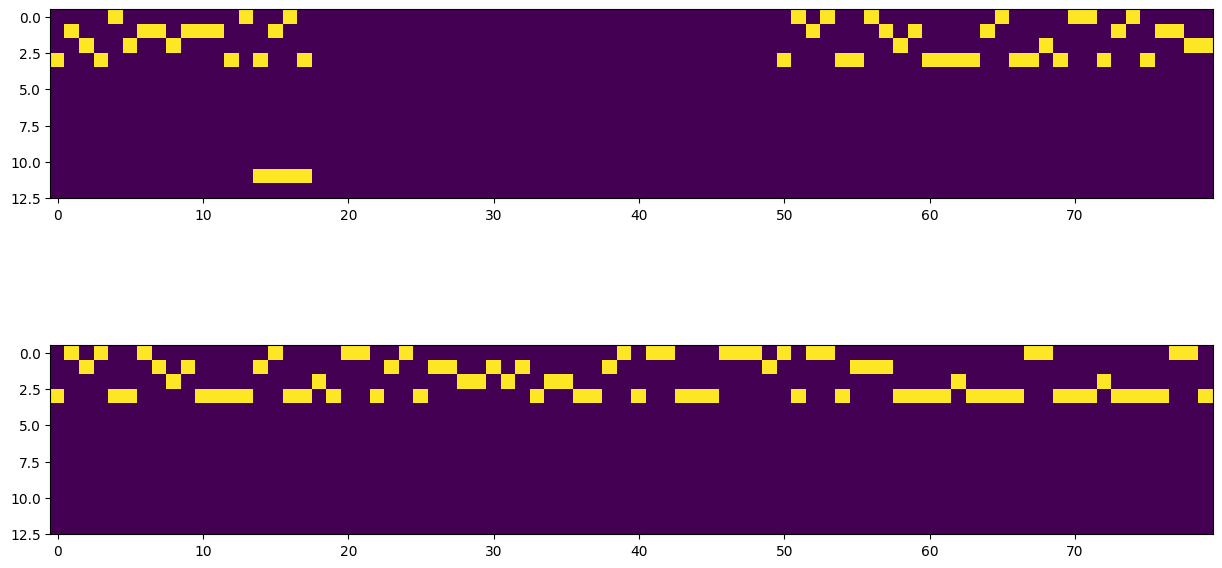

In [6]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.imshow(X_train[0][7400:7480].T)
plt.subplot(2, 1, 2)
plt.imshow(X_train[0][:80].T)

In [7]:
X_train[0].shape

(14868, 13)

In [9]:
model = Sequential([
    Conv1D(name="conv1d_1", trainable=True, input_shape=input_shape, filters=70, kernel_size=19, strides=5, padding="valid", dilation_rate=1, activation="linear", use_bias=True, kernel_initializer="VarianceScaling", bias_initializer="Zeros"),
    BatchNormalization(name="batch_normalization_1", trainable=True, axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),
    Activation(name="activation_1", trainable=True, activation="relu"),
    Dropout(name="dropout_1", trainable=True, rate=0.0),
    MaxPooling1D(name="max_pooling1d_1", trainable=True, strides=3, pool_size=3, padding="valid"),
    
    Conv1D(name="conv1d_2", trainable=True, filters=46, kernel_size=11, strides=5, padding="valid", dilation_rate=1, activation="linear", use_bias=True, kernel_initializer="VarianceScaling", bias_initializer="Zeros"),
    BatchNormalization(name="batch_normalization_2", trainable=True, axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),
    Activation(name="activation_2", trainable=True, activation="relu"),
    Dropout(name="dropout_2", trainable=True, rate=0.0),
    MaxPooling1D(name="max_pooling1d_2", trainable=True, strides=4, pool_size=4, padding="valid"),
    
    Conv1D(name="conv1d_3", trainable=True, filters=46, kernel_size=7, strides=5, padding="valid", dilation_rate=1, activation="linear", use_bias=True, kernel_initializer="VarianceScaling", bias_initializer="Zeros"),
    BatchNormalization(name="batch_normalization_3", trainable=True, axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True),
    Activation(name="activation_3", trainable=True, activation="relu"),
    Dropout(name="dropout_3", trainable=True, rate=0.0),
    MaxPooling1D(name="max_pooling1d_3", trainable=True, strides=4, pool_size=4, padding="valid"),
    
    Flatten(name="flatten", trainable=True, data_format="channels_last"),
    
    Dense(name="dense_1", trainable=True, units=32, activation="linear", use_bias=True, kernel_initializer="VarianceScaling", bias_initializer="Zeros"),
    Activation(name="activation_4", trainable=True, activation="relu"),
    Dropout(name="dropout_4", trainable=True, rate=0.3),
    
    Dense(name="dense_2", trainable=True, units=64, activation="linear", use_bias=True, kernel_initializer="VarianceScaling", bias_initializer="Zeros"),
    
    Dense(name="denes_final", trainable=True, units=5, activation="softmax", use_bias=True, kernel_initializer="VarianceScaling", bias_initializer="Zeros")
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2970, 70)          17360     


                                                                 
 batch_normalization_1 (Bat  (None, 2970, 70)          280       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 2970, 70)          0         
                                                                 
 dropout_1 (Dropout)         (None, 2970, 70)          0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 990, 70)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 196, 46)           35466     
                                                                 
 batch_normalization_2 (Bat  (None, 196, 46)           184       
 chNormalization)                                                
          

In [21]:
model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [22]:
model.fit(X_train, y_train, 
          epochs=10,
          validation_split=.15,  
          batch_size=32,
          )

Epoch 1/10
67/67 [==============================] - 20s 233ms/step - loss: 1.6100 - accuracy: 0.1968 - val_loss: 1.6114 - val_accuracy: 0.1760
Epoch 2/10
67/67 [==============================] - 13s 192ms/step - loss: 1.6098 - accuracy: 0.2043 - val_loss: 1.6112 - val_accuracy: 0.1760
Epoch 3/10
67/67 [==============================] - 13s 188ms/step - loss: 1.6097 - accuracy: 0.2043 - val_loss: 1.6117 - val_accuracy: 0.1760
Epoch 4/10
67/67 [==============================] - 14s 208ms/step - loss: 1.6098 - accuracy: 0.1930 - val_loss: 1.6106 - val_accuracy: 0.1760
Epoch 5/10
67/67 [==============================] - 14s 214ms/step - loss: 1.6097 - accuracy: 0.1977 - val_loss: 1.6113 - val_accuracy: 0.1893
Epoch 6/10
67/67 [==============================] - 16s 241ms/step - loss: 1.6098 - accuracy: 0.2015 - val_loss: 1.6110 - val_accuracy: 0.1760
Epoch 7/10
67/67 [==============================] - 14s 206ms/step - loss: 1.6097 - accuracy: 0.2043 - val_loss: 1.6115 - val_accuracy: 0.1760

In [14]:
def cnn_block(layer, filters_num: int, kernel_size: int, strides: int, padding: int, dropout_rate: float, name_index: int, pool_size: int, pool_strides: int, pool_padding: int):
    layer = Conv1D(
        filters=filters_num,
        kernel_size=kernel_size,
        strides=strides,
        padding=padding,
        activation='relu',
        kernel_initializer='VarianceScaling',
        bias_initializer='Zeros',
        name=f'conv_{name_index}'
    )(layer)
    
    layer = BatchNormalization(name=f'batch_{name_index}')(layer)
    layer = Activation(activation='relu', name=f'activation_{name_index}')(layer)
    layer = Dropout(rate=dropout_rate, name=f'dropout_{name_index}')(layer)
    layer = MaxPooling1D(pool_size=pool_size, strides=pool_strides, padding=pool_padding, name=f'max_pooling_{name_index}')(layer)
    
    return layer

In [13]:
def build_model(input_shape):
    inputs = Input(shape=input_shape, dtype=float, name="data")
    # labels = tf.keras.layers.Input(name="label", shape=(None,))
    
    layer = cnn_block(layer=inputs, filters_num=256, kernel_size=12, strides=3, padding='valid', dropout_rate=0, name_index=1, pool_size=3, pool_strides=3, pool_padding='valid')
    layer = cnn_block(layer=layer, filters_num=256, kernel_size=12, strides=3, padding='valid', dropout_rate=0, name_index=2, pool_size=4, pool_strides=4, pool_padding='valid')
    layer = cnn_block(layer=layer, filters_num=128, kernel_size=12, strides=3, padding='valid', dropout_rate=0, name_index=3, pool_size=4, pool_strides=4, pool_padding='valid')
    
    layer = Flatten(name='flatten')(layer)
    
    layer = Dense(units=32, activation='relu', kernel_initializer='VarianceScaling', bias_initializer='Zeros', name='dense1')(layer)
    layer = Activation(activation='relu', name=f'activation_{4}')(layer)
    layer = Dropout(0.3, name='dropout_4')(layer)
    # layer = Dense(units=1, activation='relu', kernel_initializer='VarianceScaling', bias_initializer='Zeros', name='dense2')(layer)
    
    outputs = Dense(units=5, activation='softmax', kernel_initializer='VarianceScaling', bias_initializer='Zeros')(layer)
    
    model = Model(inputs=inputs, outputs=outputs, name='cnn_model')
    
    return model


In [14]:
model = build_model(input_shape=input_shape)
model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 14868, 13)]       0         
                                                                 
 conv_1 (Conv1D)             (None, 4953, 256)         40192     
                                                                 
 batch_1 (BatchNormalization  (None, 4953, 256)        1024      
 )                                                               
                                                                 
 activation_1 (Activation)   (None, 4953, 256)         0         
                                                                 
 dropout_1 (Dropout)         (None, 4953, 256)         0         
                                                                 
 max_pooling_1 (MaxPooling1D  (None, 1651, 256)        0         
 )                                                       

In [15]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
now = datetime.now().strftime('%d-%m-%Y_%H-%M')

checkpoint_callback = ModelCheckpoint(filepath=f"../model/ModelCheckPoint/{now}/" + "model.{epoch:03d}-{val_loss:.4f}-{val_accuracy:.4f}.h5",
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False,
                                      verbose=1)
tensorboard_callback = TensorBoard(log_dir=f"../model/TensorBoard/{now}/logs")

folder_logger_path = f"../model/CSVLogger/{now}"

if os.path.exists(folder_logger_path) and os.path.isdir(folder_logger_path):
    os.rmdir(folder_logger_path)
os.makedirs(folder_logger_path)

csv_logger_callback = CSVLogger(f"{folder_logger_path}/training.log")

In [17]:
model.fit(X_train, y_train, 
          epochs=10,
          validation_split=.15,  
          batch_size=64,
          callbacks=[checkpoint_callback,
                     tensorboard_callback,
                     csv_logger_callback]
          )
model.save(f"../model/FinalModel/{now}/model.h5")

: 

In [15]:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 500ms/step


In [18]:
y_test

array([[1.]])

In [16]:
y_pred

array([[0.39562103, 0.3758532 , 0.22339624, 0.00399503, 0.00113445]],
      dtype=float32)

In [19]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: 0.9786 - accuracy: 0.0000e+00


[0.9785565733909607, 0.0]